Analyzing Model Performance Assignment
In this assignment you will load a dataset and train a Logistic regression Classifier use the techniques discussed in the lesson to measure the performance. We will use the Statlog Shuttle dataset from UCI to train a classifier to predict a full house. After you complete the challenge and the associated assessment questions you will be asked to provide a URL to your Jupyter notebook.
The Dataset
Each record contain 9 numerical attributes. The 10th column is the target column. There are two classes to predict, we will call them positive and negative.

1. Import necessary packages
For this exercise we need

pandas
train_test_split
LogisticRegression
pyplot from matplotlib
KNeighborsClassifier
LogisticRegressionClassifier
RandomForestClassifier
DummyClassifier


In [10]:
# all imports in one place for convenience
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups_vectorized
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
%matplotlib inline

3. Create the model
Instantiate a Logistic Regression classifier with a lbfgs solver.
Fit the classifier to the data.


In [63]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/shuttle/shuttle.tst', header=None, sep=' ')

df.loc[df[9] != 4, 9] = 0
df.loc[df[9] == 4, 9] = 1

In [64]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000)





2. Load and prepare the dataset
Load the training data into a dataframe named df_train_data 
Create binary classification problem - rename some class labels
Create a dataframe of 9 features named X, drop column 9.
Create a data frame of labels named y, select only column 9.
Split the data into a training set and a test set.


In [66]:
# X, y = df.drop('Class', axis = 1), df['Class']

# y_2 = y.copy()
# y_2[y_2 != 1] = 0
# y_2[y_2 == 1] = 1

X = df.drop([9], axis=1)

y = df[9]
X_train, X_test, y_train, y_test = train_test_split(X, y)


4. Calculate Accuracy
Calculate and print the accuracy of the model on the test data.



In [67]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.824

5. Dummy Classifier
Use the dummy classifier to calculate the accuracy of a purely random chance.

Compare this result to the result of the logistic regression classifier above. What does this result tell you?

 



In [68]:
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)
#Large class imbalance

0.8515862068965517

6. Confusion Matrix
Print the confusion matrix.



In [69]:
predictions = lr.predict(X_test)
confusion = confusion_matrix(y_test, predictions, labels=[1, 0])

confusion


array([[  21,  517],
       [ 121, 2966]])

7. Plot a nicer confusion matrix (optional)
Use the plot_confusion_matrix function from above to plot a nicer looking confusion matrix.



In [70]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

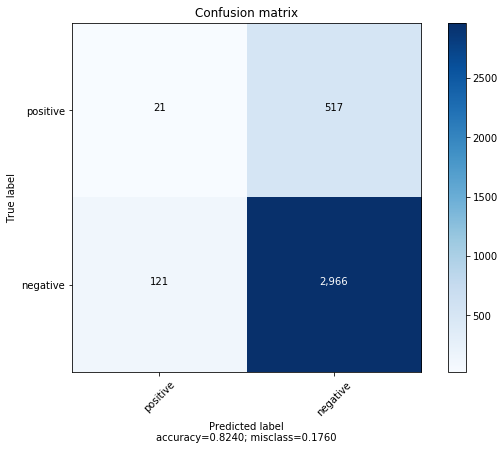

In [71]:
plot_confusion_matrix(cm = confusion, target_names = ['positive', 'negative'], normalize=False)

8. Calculate Metrics
Print the F1, F beta, precision, recall and accuracy scores.



In [72]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, 0.5)
fbeta_recall = fbeta_score(y_test, predictions, 2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.82
Precision score: 0.15
Recall score: 0.04
F1 score: 0.06
Fbeta score favoring precision: 0.09
FBeta score favoring recall: 0.05


/Users/robholmstrom/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass beta=0.5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/Users/robholmstrom/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass beta=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


9. Print a classification report


In [73]:
report = classification_report(y_test, predictions, target_names=['Postive', 'Negative'])
print(report)

              precision    recall  f1-score   support

     Postive       0.85      0.96      0.90      3087
    Negative       0.15      0.04      0.06       538

    accuracy                           0.82      3625
   macro avg       0.50      0.50      0.48      3625
weighted avg       0.75      0.82      0.78      3625



10. Plot ROC Curve and AUC
Caculate AUC and plot the curve.



<Figure size 432x432 with 0 Axes>

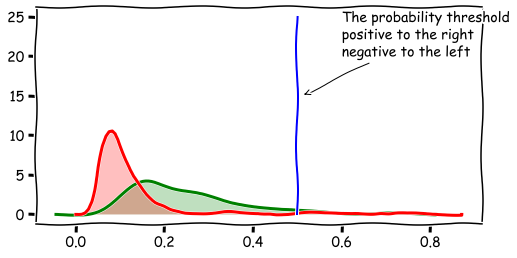

In [74]:

probs = lr.predict_proba(X_test)[:, 1]
fig = plt.figure(figsize = (6, 6))
pos = [i for i, j in zip(probs, y_test) if j == 1]
neg = [i for i, j in zip(probs, y_test) if j == 0]

with plt.xkcd():
  fig = plt.figure(figsize=(8, 4))

  sns.distplot(pos, hist = False, kde = True, color='g',
                 kde_kws = {'shade': True, 'linewidth': 3})

  sns.distplot(neg, hist = False, kde = True, color='r',
                 kde_kws = {'shade': True, 'linewidth': 3})

  plt.plot([0.5, 0.5], [0, 25], '-b')
  plt.annotate(
        'The probability threshold\npositive to the right\nnegative to the left',
        xy=(0.51, 15), arrowprops=dict(arrowstyle='->'), xytext=(0.6, 20))

plt.show()

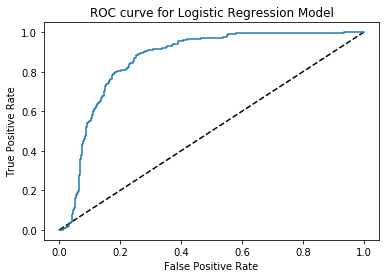

In [75]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

11. Plot Precision-Recall Curve
Plot the precision-recall curve for the model above.

Find the best value for C in the Logistic Regression Classifier for avoiding overfitting. Plot the training and testing accuracy over a range of C values from 0.05 to 1.5.



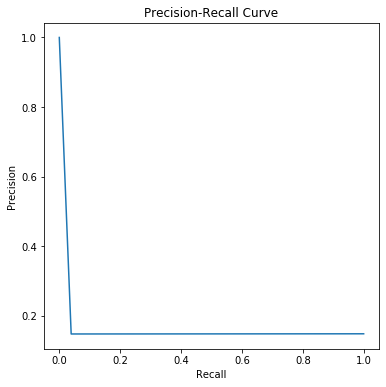

In [76]:
pres, rec, thresholds = precision_recall_curve(y_test, predictions)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

12. Cross Validation
Perform 5-fold cross validation for a Logistic Regression Classifier. Print the 5 accuracy scores and the mean validation score.



In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)
clf = LogisticRegression(solver='lbfgs', max_iter=1000)
cv_scores = cross_val_score(clf, X_train, y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validatiion score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.82068966 0.82252874 0.83310345 0.82850575 0.82206897]
Mean cross validatiion score: 0.825


13. Is this really linear?
Our linear classifier is not giving us accuracy better than the dummy classifier. Suppose that the data was not linearly separable? Instantiate and train a KNN model with k = 7. How does the accuracy of the KNN model compare to the Logistic Regression from above? What does that tell you about the data?



In [80]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=5)

# Then  fit the model
knn.fit(X_train, y_train)

# How well did we do
knn_5_score = knn.score(X_test, y_test)
knn_5_predictions = knn.predict(X_test)

print('Accuracy of KNN (k = 5): {:.3f}'.format(knn_5_score))

Accuracy of KNN (k = 5): 0.999


14. Random Forest
Next, instantiate and fit a RandomForestClassifier and calculate the accuracy of that model.

 



In [81]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 22, random_state = 40)

rf.fit(X_train,y_train)

rf_score = rf.score(X_test, y_test)
rf_predictions = rf.predict(X_test)

print('Accuracy of Random Forest: {:.3f}'.format(rf_score))


Accuracy of Random Forest: 1.000


Now, some additional questions about analyzing model performance.